In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import numpy as np
import seaborn as sns
from IPython.display import display
from scipy import stats

os.listdir()

['.git',
 '.ipynb_checkpoints',
 '2-diamonds.csv',
 '2-stats.pdf',
 'diamonds.ipynb',
 'diamonds_etienne.ipynb',
 'diamonds_etienne.py',
 'Prix_clarity.jpg',
 'Prix_color.jpg',
 'Prix_cut.jpg',
 'Prix_var-qualitatives.jpg']

In [2]:
diamonds = pd.read_csv("2-diamonds.csv")

print(diamonds.shape)

print(diamonds.columns)


(53940, 10)
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


# Seconde partie

Rechercher des liens entre le prix et les autres variables : statistiques bivariées

Corrélation du prix avec les autres variables quantitatives :



carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


Les variables les plus corrélées avec le prix sont le carat, et les mesures x, y et z



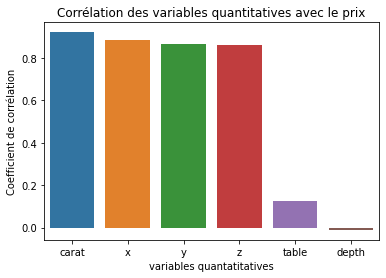

In [3]:
# Corrélation entre le prix et les autres variables
corr = diamonds.corr()

# Je retire la corrélation prix/prix
corr_price = corr["price"].sort_values(ascending=False).drop("price", axis=0)

print("Corrélation du prix avec les autres variables quantitatives :\n")

# Affichage de la table de corrélation
display(corr_price)

print("\nLes variables les plus corrélées avec le prix sont le carat, et les mesures x, y et z\n")

# graphique en barres de corr
p = sns.barplot(x=corr_price.index, y=corr_price.values);
p.set(title='Corrélation des variables quantitatives avec le prix'
      , xlabel = "variables quantatitatives"
      , ylabel = "Coefficient de corrélation");

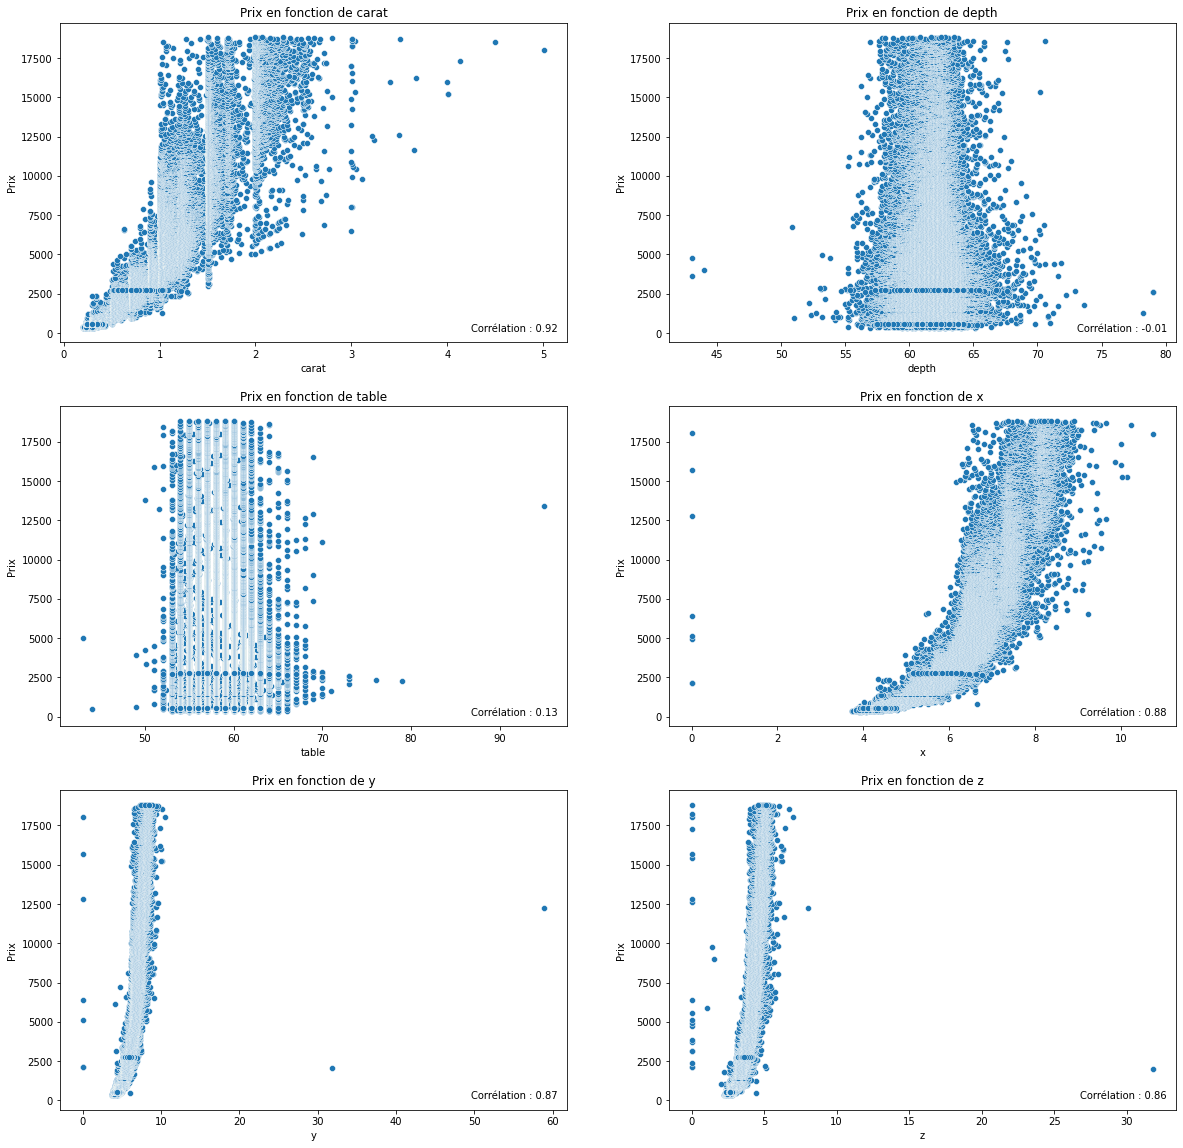

In [4]:
# tableau de graphiques scatterplot des variables quantitatives en fonction du prix

# Figure de dimension 3,2
fig, ax = plt.subplots(3,2, figsize=(20,20));

# Sélection des variables qualitatives
variables_quantitatives = diamonds.select_dtypes(include=['int64', 'float64']).columns.drop("price")

# Compteur pour la variable à sélectionner
var_i = 0

# Je parcours la figure
for i in range(3):
    for j in range(2):
        
        # Je récupère la variabe
        var = variables_quantitatives[var_i]
        
        # Je place le nuage de points dans la matrice
        p = sns.scatterplot(x=var, y="price", data=diamonds, ax=ax[i,j]);
        p.set(title="Prix en fonction de {}".format(var), xlabel=var, ylabel="Prix");
        anc = AnchoredText("Corrélation : {}".format(round(corr[var]["price"], 2)), loc="lower right", frameon=False)
        ax[i,j].add_artist(anc)
        
        # J'incrémente le compteur pour la variable suivante
        var_i = var_i + 1
        
plt.savefig("Prix_variables.jpg")

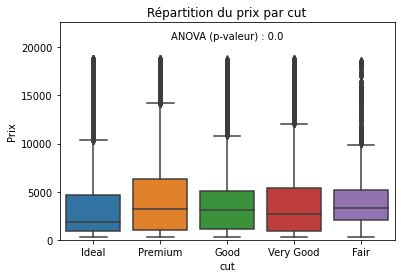

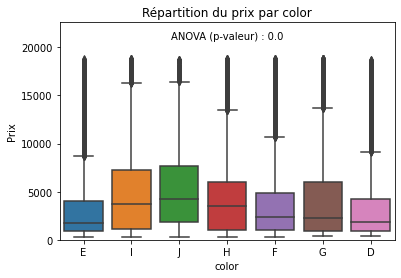

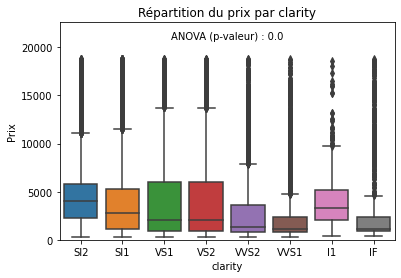

In [5]:
# Anova des variables quantitatives

# Sélection des variables qualitatives
diamonds_qual = diamonds.select_dtypes(include=['object'])

# Boucle sur chaque variable
for i in diamonds_qual :
    
    # Formatage, puis calcul de l'Anova entre le prix et la variable
    anova = [diamonds["price"][diamonds[i] == s] for s in list(diamonds[i].unique())]
    # F1 score et p-valeur
    F, p_val = stats.f_oneway(*anova)
    
    # Graphique
    p = sns.boxplot(x=i, y="price", data=diamonds);
    p.set(title='Répartition du prix par {}'.format(i), xlabel=i, ylabel="Prix");
    p.set_ylim(bottom=0, top=max(diamonds["price"]) + max(diamonds["price"]) * 0.2)
    anc = AnchoredText("ANOVA (p-valeur) : {}".format(round(p_val,2)), loc="upper center", frameon=False);
    p.axes.add_artist(anc);
    plt.savefig("Prix_{}.jpg".format(i))
    plt.show()
    

In [8]:
# lienPrixQuanti(variable) prend en paramètre une chaîne de charactères correspondant à une variable quantitative 
# et retourne les coefficients de corrélation et un nuage de points de la variable quantitative en fonction du prix
def lienPrixQuanti(variable : str):

    # Matrice de corrélation
    
    corr = diamonds.corr()
    corr_variable = corr[variable].sort_values(ascending=False).drop(variable, axis=0)
    print("\nCorrélation de la variable {} avec les autres variables quantitatives :\n".format(variable))
    print(corr_variable)

    print("\n")

    # Graphique en barres des coefficients de corrélation

    p = sns.barplot(x=corr_variable.index, y=corr_variable.values);
    p.set(title='Corrélation de la variable {} avec les autres variables quantitatives'.format(variable),
            xlabel=variable, ylabel="Coefficient de corrélation");
    plt.show()

    print("\n")

    # Nuage de points de la variable en fonction du prix
    
    fig, ax = plt.subplots(1)
    
    p = sns.scatterplot(x=variable, y="price", data=diamonds);
    p.set(title="Nuage de points de la variable {} en fonction du prix".format(variable), xlabel=variable, ylabel="Prix");
    anc = AnchoredText("Corrélation : {}".format(round(corr[var]["price"], 2)), loc="lower right", frameon=False)
    ax.add_artist(anc)
    plt.show()

# lienPrixQuanti(variable) prend en paramètre une chaîne de charactères correspondant à une variable qualitative 
# et retourne une Anova et une boîte à moustaches de la variable en fonction du prix
def lienPrixQuali(variable) :

    # ANOVA
    
    anova = [diamonds["price"][diamonds[variable] == s] for s in list(diamonds[variable].unique())]
    F, p_val = stats.f_oneway(*anova)


    # boîte à moustaches de la variable en fonction du prix

    p = sns.boxplot(x=variable, y="price", data=diamonds);
    p.set(title='Répartition du prix par '.format(variable), xlabel=variable, ylabel="Prix");
    p.set_ylim(bottom=0, top=max(diamonds["price"]) + max(diamonds["price"]) * 0.2);
    anc = AnchoredText("ANOVA (p-valeur) : {}".format(round(p_val,2)), loc="upper center", frameon=False);
    p.axes.add_artist(anc);
    plt.show()
    
help(lienPrixQuanti)

help(lienPrixQuali)

Help on function lienPrixQuanti in module __main__:

lienPrixQuanti(variable: str)
    # lienPrixQuanti(variable) prend en paramètre une chaîne de charactères correspondant à une variable quantitative 
    # et retourne les coefficients de corrélation et un nuage de points de la variable quantitative en fonction du prix

Help on function lienPrixQuali in module __main__:

lienPrixQuali(variable)
    # lienPrixQuanti(variable) prend en paramètre une chaîne de charactères correspondant à une variable qualitative 
    # et retourne une Anova et une boîte à moustaches de la variable en fonction du prix



ANALYSE DE LA VARIABLE CARAT :


Corrélation de la variable carat avec les autres variables quantitatives :

x        0.975094
z        0.953387
y        0.951722
price    0.921591
table    0.181618
depth    0.028224
Name: carat, dtype: float64




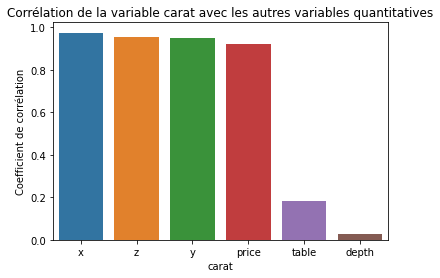

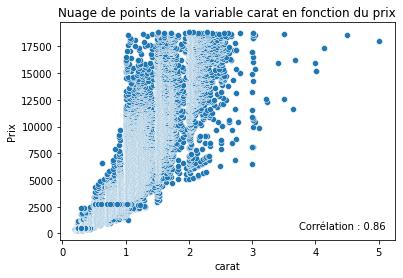


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE CUT :



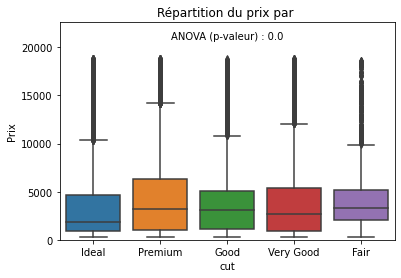


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE COLOR :



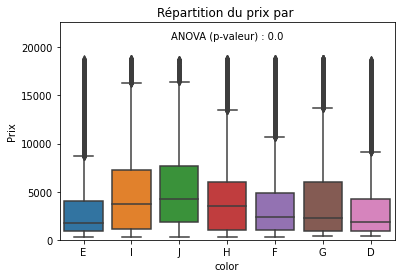


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE CLARITY :



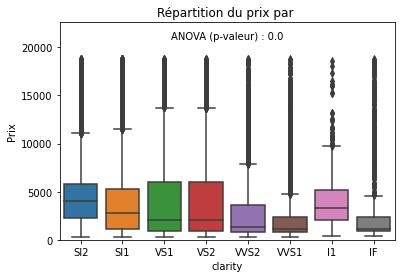


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE DEPTH :


Corrélation de la variable depth avec les autres variables quantitatives :

z        0.094924
carat    0.028224
price   -0.010647
x       -0.025289
y       -0.029341
table   -0.295779
Name: depth, dtype: float64




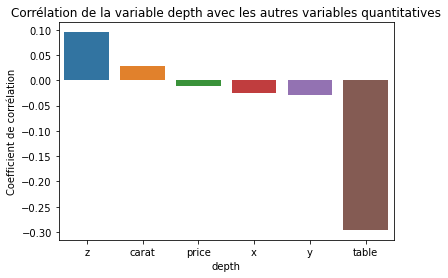

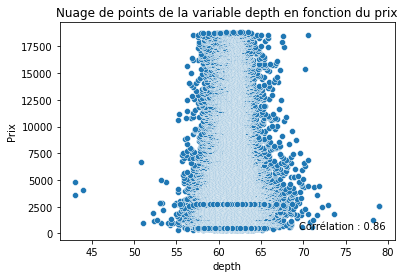


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE TABLE :


Corrélation de la variable table avec les autres variables quantitatives :

x        0.195344
y        0.183760
carat    0.181618
z        0.150929
price    0.127134
depth   -0.295779
Name: table, dtype: float64




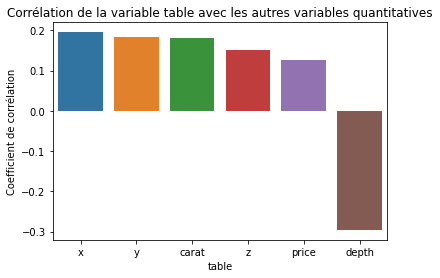

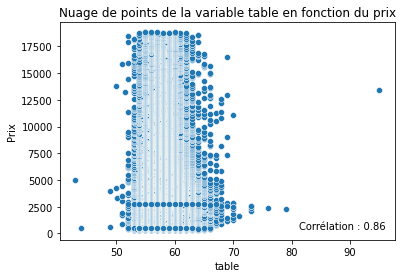


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE PRICE :


Corrélation de la variable price avec les autres variables quantitatives :

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64




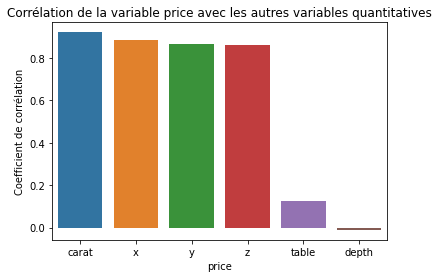

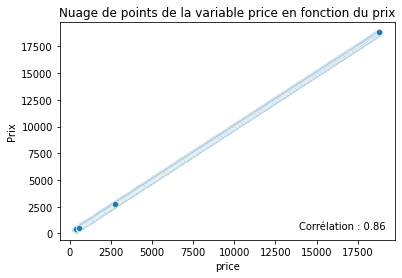


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE X :


Corrélation de la variable x avec les autres variables quantitatives :

carat    0.975094
y        0.974701
z        0.970772
price    0.884435
table    0.195344
depth   -0.025289
Name: x, dtype: float64




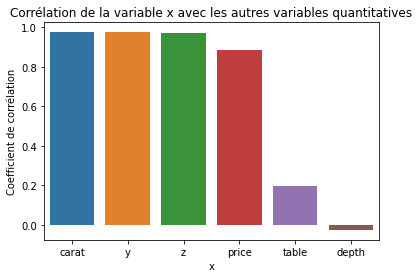

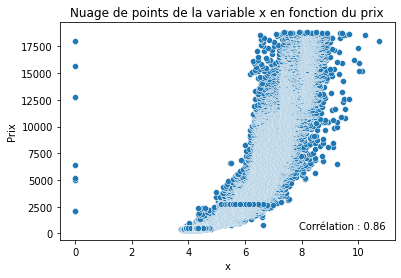


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE Y :


Corrélation de la variable y avec les autres variables quantitatives :

x        0.974701
z        0.952006
carat    0.951722
price    0.865421
table    0.183760
depth   -0.029341
Name: y, dtype: float64




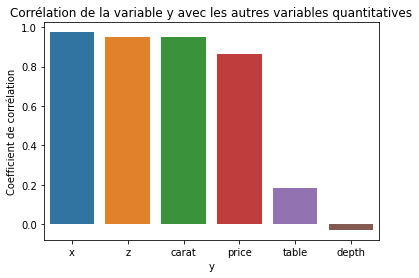

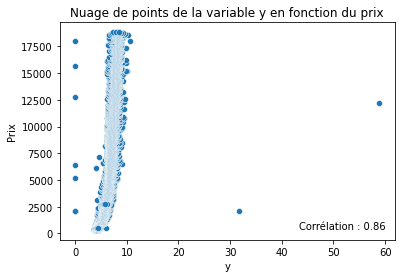


────────────────────────────────────────────────────────────
ANALYSE DE LA VARIABLE Z :


Corrélation de la variable z avec les autres variables quantitatives :

x        0.970772
carat    0.953387
y        0.952006
price    0.861249
table    0.150929
depth    0.094924
Name: z, dtype: float64




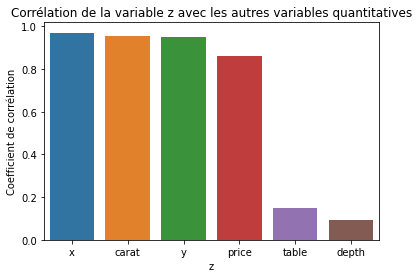

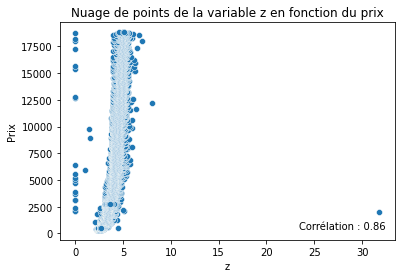

In [7]:
# Pour chaque variable de diamonds, si la variable est quantitative, 
# on lance la fonction lienPrixQuanti(variable), sinon on lance la fonction lienPrixQuali(variable)
for variable in diamonds.columns :

    print("Analyse de la variable {} :\n".format(variable).upper())

    if diamonds[variable].dtype == "int64" or diamonds[variable].dtype == "float64" :
        lienPrixQuanti(variable)
    else :
        lienPrixQuali(variable)
    
    if variable != diamonds.columns[-1] :
        print("\n" + '─' * 60)